Задача 4

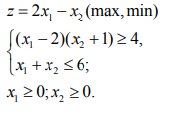




Ручное решение:

1. Построение графика ОДР


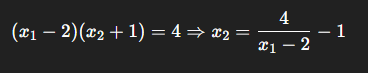 

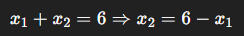

  	x1 != 2


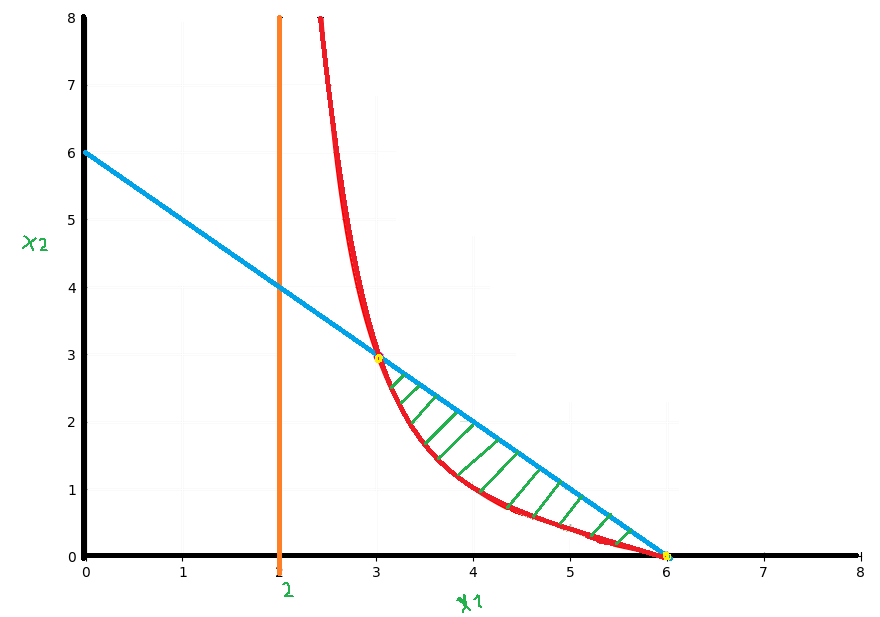



2. Поиск экстремумов

  	максимум: в точке (x1: 6, x2: 0) z = 3 * 2 - 0 = 12

  	мининмум: в точке (x1: 3, x2: 3) z = 3 * 2 - 3 = 3;

In [5]:
# Программное решение

import numpy as np
from scipy.optimize import linprog

# Создаем сетку
x1_vals = np.linspace(0.01, 10, 400)  # избегаем деления на 0
x2_hyperbola = (4 / (x1_vals - 2)) - 1

# Линейное ограничение
x1_line = np.linspace(0, 6, 200)
x2_line = 6 - x1_line

# Фон допустимой области
X1, X2 = np.meshgrid(np.linspace(0, 10, 400), np.linspace(0, 10, 400))
ineq1 = (X1 - 2)*(X2 + 1) >= 4
ineq2 = (X1 + X2) <= 6
domain = ineq1 & ineq2 & (X1 >= 0) & (X2 >= 0)

# Решаем задачу линейного программирования
# Maximize z = 2x1 - x2 <=> Minimize -2x1 + x2
c_max = [-2, 1]
c_min = [2, -1]

# Ограничения в виде: A_ub * x <= b_ub
A = [
    [1, 1],                      # x1 + x2 <= 6
    [-1, 0],                     # -x1 <= 0
    [0, -1]                      # -x2 <= 0
]

b = [6, 0, 0]

# Добавим нелинейное ограничение через фильтрацию позже

# Перебираем точки сетки и проверяем ограничения
feasible_points = []
for x1 in np.linspace(0.01, 6, 300):
    for x2 in np.linspace(0.01, 6, 300):
        if (x1 + x2 <= 6) and (x1 >= 0) and (x2 >= 0) and ((x1 - 2)*(x2 + 1) >= 4):
            feasible_points.append((x1, x2))

# Найдём экстремумы
feasible_points = np.array(feasible_points)
z_vals = 2 * feasible_points[:, 0] - feasible_points[:, 1]
max_idx = np.argmax(z_vals)
min_idx = np.argmin(z_vals)

max_point = feasible_points[max_idx]
min_point = feasible_points[min_idx]


print(f"Максимум: z = {z_vals[max_idx]:.2f} в точке x₁ = {max_point[0]:.2f}, x₂ = {max_point[1]:.2f}")
print(f"Минимум: z = {z_vals[min_idx]:.2f} в точке x₁ = {min_point[0]:.2f}, x₂ = {min_point[1]:.2f}")


Максимум: z = 11.95 в точке x₁ = 5.98, x₂ = 0.01
Минимум: z = 3.06 в точке x₁ = 3.02, x₂ = 2.97


Задача 5

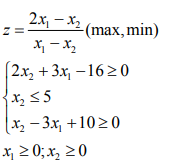

Ручное решение: 

1. Построение графика ОДР:

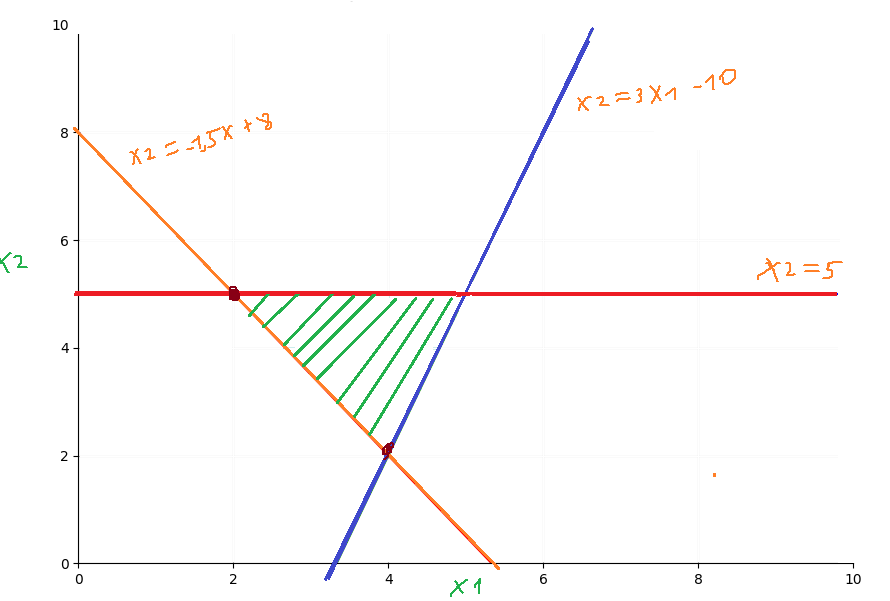

2. Нахождение экстремумов:

	максимум в точке (4, 2): z = (8 - 2) / (4 - 2) = 3
	
	минимум в точке  (2, 5): z = (4 - 5) / (2 - 5) = 1/3

In [1]:
# Программное решение

import numpy as np

# Ограничения
x1_vals = np.linspace(0, 10, 400)
x2_line1 = (16 - 3 * x1_vals) / 2  # x2 >=
x2_line2 = 5 * np.ones_like(x1_vals)  # x2 <= 5
x2_line3 = 3 * x1_vals - 10  # x2 >=

# Сетка
X1, X2 = np.meshgrid(np.linspace(0, 10, 400), np.linspace(0, 10, 400))
ineq1 = 2 * X2 + 3 * X1 - 16 >= 0
ineq2 = X2 <= 5
ineq3 = X2 - 3 * X1 + 10 >= 0
domain = ineq1 & ineq2 & ineq3 & (X1 >= 0) & (X2 >= 0)


# Перебор допустимых точек
feasible_points = []
for x1 in np.linspace(0.01, 10, 300):
    for x2 in np.linspace(0.01, 10, 300):
        if (2*x2 + 3*x1 >= 16) and (x2 <= 5) and (x2 >= 3*x1 - 10) and (x1 >= 0) and (x2 >= 0):
            if abs(x1 - x2) > 1e-4:  # избегаем деления на 0
                feasible_points.append((x1, x2))

feasible_points = np.array(feasible_points)
z_vals = (2 * feasible_points[:, 0] - feasible_points[:, 1]) / (feasible_points[:, 0] - feasible_points[:, 1])
max_idx = np.argmax(z_vals)
min_idx = np.argmin(z_vals)

max_point = feasible_points[max_idx]
min_point = feasible_points[min_idx]


print(f"Максимум: z = {z_vals[max_idx]:.2f} в точке x₁ = {max_point[0]:.2f}, x₂ = {max_point[1]:.2f}")
print(f"Минимум: z = {z_vals[min_idx]:.2f} в точке x₁ = {min_point[0]:.2f}, x₂ = {min_point[1]:.2f}")


Максимум: z = 149.30 в точке x₁ = 4.95, x₂ = 4.92
Минимум: z = -147.30 в точке x₁ = 4.95, x₂ = 4.99
